In [1]:
import os
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import networkx as nx
import nxutils as nxu
from dataclasses import asdict
from rich import print
from rich.tree import Tree
from rich.errors import NotRenderableError
from nxutils import diGraph_to_richTree
from tbdoist import tditer_to_graph


from todoist_api_python.api import TodoistAPI

In [2]:
tdapi = TodoistAPI(os.getenv("TODOIST_API_KEY"))

In [3]:
get_funcs = {"projects": tdapi.get_projects,
          "sections": tdapi.get_sections,
          "tasks": tdapi.get_tasks}
results = {}
for func in get_funcs:
    results[func] = get_funcs[func]()

In [4]:
tdg = nx.DiGraph()
for kind in results:
    tditer_to_graph(results[kind], g=tdg)
    #for obj in results[iter]:
    #    print(obj, type(obj))

In [5]:
tdg.name = "Todoist"

In [6]:
t = diGraph_to_richTree(nx.reverse_view(tdg), attr=["content", "name"])
print(t)

Todoist
├── Inbox
│   ├── Ecoflex 00-10
│   ├── Say nithing
│   ├── DS 20
│   ├── Eclipse Check librarly sightlines
│   ├── eclipse check irish green / south quad sight lines.
│   ├── Reply https://mail.google.com/mail/u/0/#inbox/FMfcgzGwJcgmvpZpwshqDSMpDBpWvZMS
│   ├── Order this https://mail.google.com/mail/u/0/#inbox/FMfcgzGwJcgnGFKcdGCSMrqxjDsrmqzq
│   ├── Reorg: write a tool that adds labels based on keywords etc.
│   ├── Ecoflex gel
│   ├── https://iopscience.iop.org/article/10.1088/1361-6382/aba4bc
│   ├── (https://mail.google.com/mail/u/0/#inbox/FMfcgzGwJcgnPXRFrqwQhLVNFlqbPLKp) REU Illinois
│   ├── watch "Alone"
│   ├── Reorganize Todoist: calendar projects are just the connection between events and the todo system.
│   ├── Check in with Robert Goulding et al. about historical talks about eclipses.
│   ├── stephen reccs
│   ├── [4/8 Eclipse planning updates - kdavis10@nd.edu - University of Notre Dame 
│   │   Mail](https://mail.google.com/mail/u/0/#inbox/FMfcgzGwHxvtPZzsDmSGSwvLfkKDGklX) Reply to deanna about 
│   │   eclipse stuff.
│   ├── read this https://mail.google.com/mail/u/0/#inbox/FMfcgzGwJckFqjVRRRBKqfZBnHRDfGbg
│   ├── Rogues
│   ├── Silicones
│   │   └── Ecoflex 5
│   ├── Eclipse ask Jordan if he will be around.
│   ├── Eclipse ask Lauren about her talk topic to see if there's room for another one.
│   ├── Sorted
│   ├── Sophie Scott brown anarchy
│   └── read academic generative AI stuff.
├── Main Work =
│   ├── Buy domain name.
│   ├── Distance Data plot color.
│   ├── figure out how to communicate with margot 
│   │   (https://mail.google.com/mail/u/0/#inbox/FMfcgzGwHpbcCrTBFDhfcJrrBNBXPRxK)
│   ├── Waiting
│   ├── Handbook
│   ├── Privacy policy for communications with me.
│   ├── [Effective Grievance Handling: The Employer's Ultimate 
│   │   Guide](https://www.i-sight.com/resources/effective-grievance-handling-the-ultimate-guide-for-employers/)
│   ├── [Training - NTEU Grievance Processing Handbook](https://www.nteu282.com/training/06grvan1.html)
│   ├── Find a historian to do the drinking gourd conversation.
│   ├── Request for safety two shows one evening one daytime. group Carianne Neslee
│   ├── order lamps
│   ├── Distance Data plot 3d
│   ├── Life Management Project
│   │   ├── [Todoist task: Online Home for Posting.](https://todoist.com/showTask?id=7132486790)
│   │   └── Roadmap for time river
│   ├── Make repo of Plot Code.
│   ├── April Eclipse Events
│   │   ├── Set up meeting with Deanna
│   │   ├── Check on Location
│   │   └── safety beat for safety message carrianne nisley
│   ├── (https://www.shrm.org/resourcesandtools/tools-and-samples/hr-qa/pages/aresolutionformanagementandemployees.
│   │   aspx)
│   ├── Prep Sara for I & O Officer
│   ├── find duties for I And O chair and set up a way to meet each of them.
│   ├── picture and bio to Nuclear Frotiers talk 
│   │   (https://mail.google.com/mail/u/0/#inbox/FMfcgzGwHfqVxTqqwQfFMXnncfjKkTlW)
│   ├── Get data on the population that we “serve” in the midwest. Regarding people of color.
│   ├── david leverton 2507023101 Phone Call.
│   ├── Check out drinking gourd early songs.
│   ├── Private place for people to let the executive committee know about concerns.
│   ├── Frontier Nuclear talk public communication.
│   ├── (https://www.indeed.com/hire/c/info/grievance-procedures-for-a-workplace)
│   ├── job request (https://job request)
│   ├── Links to other tasks may require autocomplete?
│   ├── Consider whether we want to allow sales of tickets. Make-a-wish
│   ├── send links about conference stuff to sara
│   ├── Requests
│   ├── Todoist features module
│   │   └── Tasks are schedules for a time between them and another task.
│   ├── Connections between Neorg and Todoist.
│   ├── Security Awareness training.
│   ├── Picture and nuclear frontiers talk DEADLINE
│   ├── Can domain point to synology and to github?
│   ├── create networkx network of all projects and tasks names only (shouldn't require convert yet.)
│   ├── Respond [Intro/vis

In [13]:
traces = nxu.graph_to_traces(tdg, layout_func=nx.spring_layout)

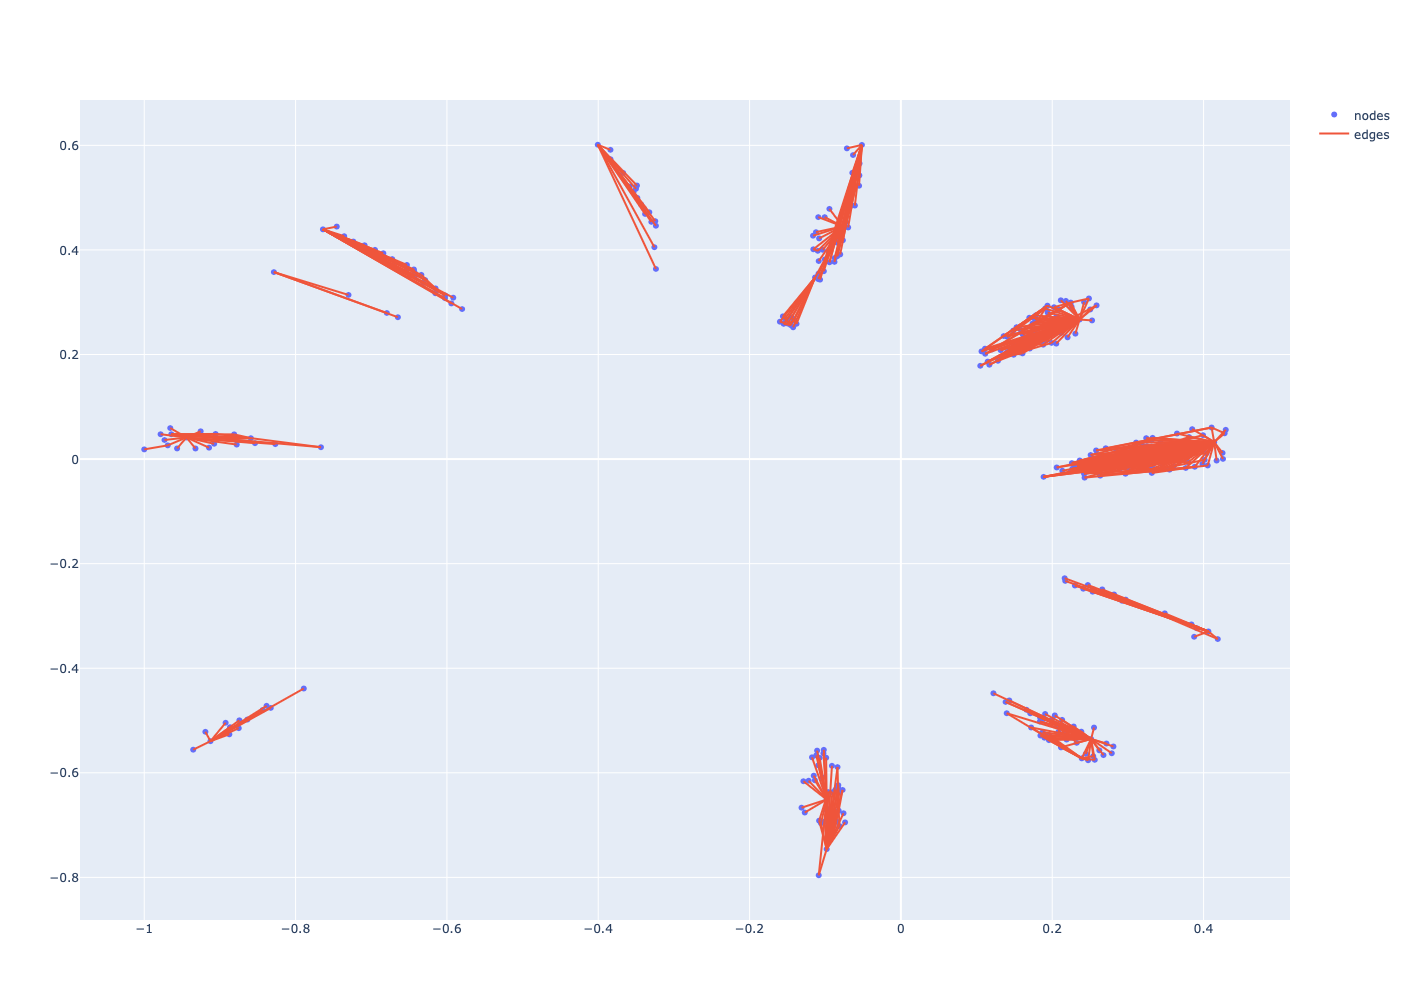

In [14]:
fig = go.Figure()
for name in traces:
    fig.add_trace(traces[name])
fig.update_layout(dict(height=1000))
fig.show()